# TEDA Examples

## TEDA Installation

In [ ]:
!pip install pyteda

## LETFK with default parameters

[23:53:22] INFO - Time step 0 - 2
[23:53:22] INFO - Time step 0.1 - 2
[23:53:22] INFO - Time step 0.2 - 2
[23:53:22] INFO - Time step 0.30000000000000004 - 2
[23:53:23] INFO - Time step 0.4 - 2
[23:53:23] INFO - Time step 0.5 - 2
[23:53:23] INFO - Time step 0.6 - 2
[23:53:23] INFO - Time step 0.7 - 2
[23:53:23] INFO - Time step 0.7999999999999999 - 2
[23:53:23] INFO - Time step 0.8999999999999999 - 2
[23:53:23] INFO - Time step 0.9999999999999999 - 2
[23:53:23] INFO - Time step 1.0999999999999999 - 2
[23:53:23] INFO - Time step 1.2 - 2
[23:53:23] INFO - Time step 1.3 - 2
[23:53:24] INFO - Time step 1.4000000000000001 - 2
[23:53:24] INFO - Time step 1.5000000000000002 - 2
[23:53:24] INFO - Time step 1.6000000000000003 - 2
[23:53:24] INFO - Time step 1.7000000000000004 - 2
[23:53:24] INFO - Time step 1.8000000000000005 - 2
[23:53:24] INFO - Time step 1.9000000000000006 - 2
[23:53:24] INFO - Simulation completed.


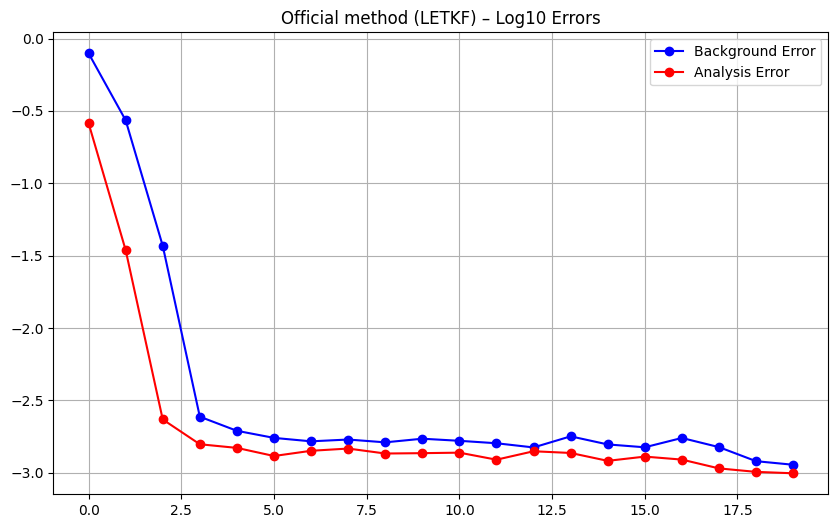

In [4]:
# 🧪 Official method: 'letkf' (using AnalysisFactory)
import numpy as np
import matplotlib.pyplot as plt

from pyteda.simulation import Simulation
from pyteda.models import Lorenz96
from pyteda.background import Background
from pyteda.observation import Observation
from pyteda.analysis.analysis_factory import AnalysisFactory

# Initialize the model
model = Lorenz96()

# Define background ensemble
background = Background(model, ensemble_size=20)

# Define the observation operator
observation = Observation(m=32, std_obs=0.01)

# Simulation parameters
params = {'obs_freq': 0.1, 'end_time': 2, 'inf_fact': 1.04}

# ✅ Use registered official method: 'letkf'
analysis = AnalysisFactory("letkf", model=model).create_analysis()

# Run the simulation
sim = Simulation(model, background, analysis, observation, params=params)
sim.run()

# Retrieve errors
errb, erra = sim.get_errors()

# Plot log10 of background and analysis errors
plt.figure(figsize=(10, 6))
plt.plot(np.log10(errb), '-ob', label='Background Error')
plt.plot(np.log10(erra), '-or', label='Analysis Error')
plt.title("Official method (LETKF) – Log10 Errors")
plt.legend()
plt.grid(True)
plt.show()


## LETKF with a localization radius of $r=2$

[23:53:33] INFO - Time step 0 - 2
[23:53:33] INFO - Time step 0.1 - 2
[23:53:33] INFO - Time step 0.2 - 2
[23:53:33] INFO - Time step 0.30000000000000004 - 2
[23:53:34] INFO - Time step 0.4 - 2
[23:53:34] INFO - Time step 0.5 - 2
[23:53:34] INFO - Time step 0.6 - 2
[23:53:34] INFO - Time step 0.7 - 2
[23:53:34] INFO - Time step 0.7999999999999999 - 2
[23:53:34] INFO - Time step 0.8999999999999999 - 2
[23:53:34] INFO - Time step 0.9999999999999999 - 2
[23:53:34] INFO - Time step 1.0999999999999999 - 2
[23:53:35] INFO - Time step 1.2 - 2
[23:53:35] INFO - Time step 1.3 - 2
[23:53:35] INFO - Time step 1.4000000000000001 - 2
[23:53:35] INFO - Time step 1.5000000000000002 - 2
[23:53:35] INFO - Time step 1.6000000000000003 - 2
[23:53:35] INFO - Time step 1.7000000000000004 - 2
[23:53:35] INFO - Time step 1.8000000000000005 - 2
[23:53:35] INFO - Time step 1.9000000000000006 - 2
[23:53:35] INFO - Simulation completed.


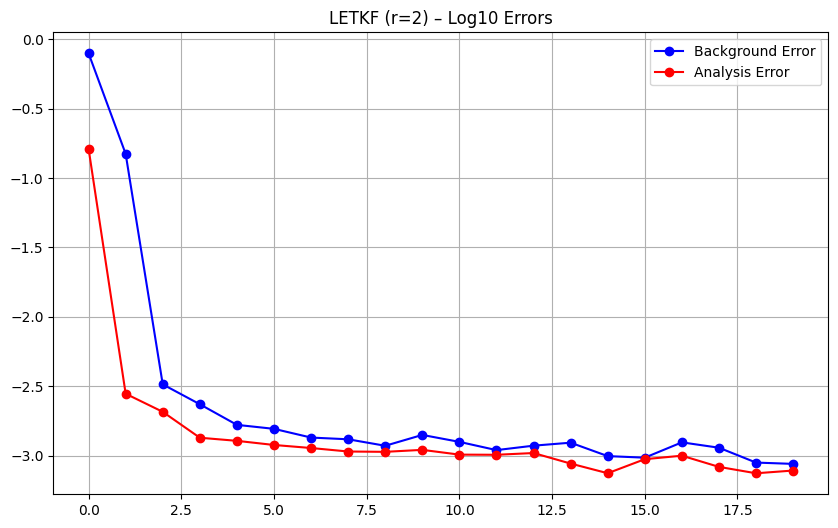

In [5]:
# 🧪 Official method: 'letkf' with r=2 (using AnalysisFactory)
import numpy as np
import matplotlib.pyplot as plt

from pyteda.simulation import Simulation
from pyteda.models import Lorenz96
from pyteda.background import Background
from pyteda.observation import Observation
from pyteda.analysis.analysis_factory import AnalysisFactory

# Initialize the model
model = Lorenz96()

# Define the background ensemble
background = Background(model, ensemble_size=20)

# Define the observation operator
observation = Observation(m=32, std_obs=0.01)

# Simulation parameters
params = {'obs_freq': 0.1, 'end_time': 2, 'inf_fact': 1.04}

# ✅ Create analysis using the LETKF method with r=2
analysis = AnalysisFactory("letkf", model=model, r=2).create_analysis()

# Run the simulation
sim = Simulation(model, background, analysis, observation, params=params)
sim.run()

# Retrieve background and analysis errors
errb, erra = sim.get_errors()

# Plot log10 of the background and analysis errors
plt.figure(figsize=(10, 6))
plt.plot(np.log10(errb), '-ob', label='Background Error')
plt.plot(np.log10(erra), '-or', label='Analysis Error')
plt.title("LETKF (r=2) – Log10 Errors")
plt.legend()
plt.grid(True)
plt.show()


## Comparing the Performance of LETKF and EnKF with B Localization ($r = 2$)

[23:53:45] INFO - Time step 0 - 2
[23:53:45] INFO - Time step 0.1 - 2
[23:53:45] INFO - Time step 0.2 - 2
[23:53:45] INFO - Time step 0.30000000000000004 - 2
[23:53:45] INFO - Time step 0.4 - 2
[23:53:45] INFO - Time step 0.5 - 2
[23:53:45] INFO - Time step 0.6 - 2
[23:53:45] INFO - Time step 0.7 - 2
[23:53:45] INFO - Time step 0.7999999999999999 - 2
[23:53:46] INFO - Time step 0.8999999999999999 - 2
[23:53:46] INFO - Time step 0.9999999999999999 - 2
[23:53:46] INFO - Time step 1.0999999999999999 - 2
[23:53:46] INFO - Time step 1.2 - 2
[23:53:46] INFO - Time step 1.3 - 2
[23:53:46] INFO - Time step 1.4000000000000001 - 2
[23:53:46] INFO - Time step 1.5000000000000002 - 2
[23:53:46] INFO - Time step 1.6000000000000003 - 2
[23:53:46] INFO - Time step 1.7000000000000004 - 2
[23:53:46] INFO - Time step 1.8000000000000005 - 2
[23:53:47] INFO - Time step 1.9000000000000006 - 2
[23:53:47] INFO - Simulation completed.
[23:53:50] INFO - Time step 0 - 2
[23:53:50] INFO - Time step 0.1 - 2
[23:53

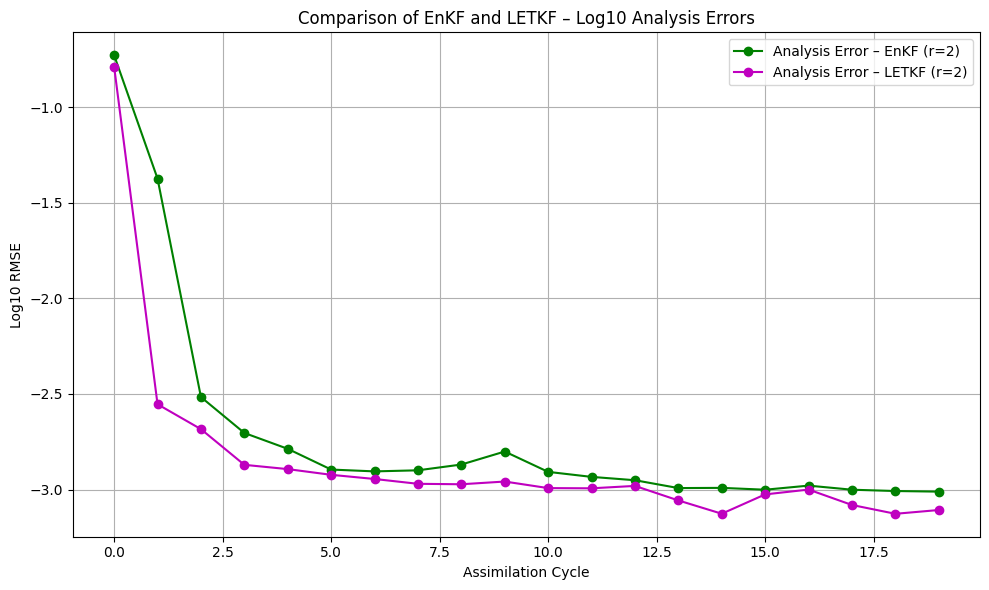

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from pyteda.simulation import Simulation
from pyteda.models import Lorenz96
from pyteda.background import Background
from pyteda.observation import Observation
from pyteda.analysis.analysis_factory import AnalysisFactory

# Shared setup for both experiments
model = Lorenz96()
background_enkf = Background(model, ensemble_size=20)
background_letkf = Background(model, ensemble_size=20)
observation = Observation(m=32, std_obs=0.01)
params = {'obs_freq': 0.1, 'end_time': 2, 'inf_fact': 1.04}

# Create EnKF analysis with localization radius r=2
analysis_enkf = AnalysisFactory("enkf-b-loc", model=model, r=2).create_analysis()
sim_enkf = Simulation(model, background_enkf, analysis_enkf, observation, params=params)
sim_enkf.run()

# Create LETKF analysis with localization radius r=2
analysis_letkf = AnalysisFactory("letkf", model=model, r=2).create_analysis()
sim_letkf = Simulation(model, background_letkf, analysis_letkf, observation, params=params)
sim_letkf.run()

# Retrieve errors from both simulations
errb_enkf, erra_enkf = sim_enkf.get_errors()
errb_letkf, erra_letkf = sim_letkf.get_errors()

# Plot the log10 of the analysis errors for comparison
plt.figure(figsize=(10, 6))
plt.plot(np.log10(erra_enkf), '-og', label='Analysis Error – EnKF (r=2)')
plt.plot(np.log10(erra_letkf), '-om', label='Analysis Error – LETKF (r=2)')
plt.title("Comparison of EnKF and LETKF – Log10 Analysis Errors")
plt.xlabel("Assimilation Cycle")
plt.ylabel("Log10 RMSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Registering a new model

### ✅ Step 1: Define and register your custom method

In this session, copy the content below and save it as `user_methods/my_enkf.py`:

```python
# user_methods/my_enkf.py

from pyteda.analysis.analysis_core import Analysis
from pyteda.analysis.registry import register_analysis

@register_analysis("my_enkf")  # ✅ Decorator to register the method
class MyEnKF(Analysis):

    def __init__(self, **kwargs):
      pass

    def perform_assimilation(self, background, observation):
        # Simple assimilation: apply scaled innovation
        HXb = observation.H @ background.Xb
        innovations = observation.y[:, None] - HXb
        self.Xa = background.Xb + 0.1 * (observation.H.T @ innovations)
        return self.Xa

    def get_analysis_state(self):
        return self.Xa.mean(axis=1)

    def get_ensemble(self):
        return self.Xa

    def get_error_covariance(self):
        Xa_mean = self.Xa.mean(axis=1, keepdims=True)
        return ((self.Xa - Xa_mean) @ (self.Xa - Xa_mean).T) / (self.Xa.shape[1] - 1)

    def inflate_ensemble(self, inflation_factor):
        mean = self.Xa.mean(axis=1, keepdims=True)
        self.Xa = mean + inflation_factor * (self.Xa - mean)
```

### Path

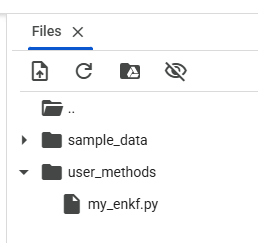

---

### 📁 Step 2: Use your method via the factory



[07:28:32] INFO - Time step 1/10
INFO:Simulation:Time step 1/10
[07:28:32] INFO - Time step 2/10
INFO:Simulation:Time step 2/10
[07:28:32] INFO - Time step 3/10
INFO:Simulation:Time step 3/10
[07:28:32] INFO - Time step 4/10
INFO:Simulation:Time step 4/10
[07:28:32] INFO - Time step 5/10
INFO:Simulation:Time step 5/10
[07:28:32] INFO - Time step 6/10
INFO:Simulation:Time step 6/10
[07:28:33] INFO - Time step 7/10
INFO:Simulation:Time step 7/10
[07:28:33] INFO - Time step 8/10
INFO:Simulation:Time step 8/10
[07:28:33] INFO - Time step 9/10
INFO:Simulation:Time step 9/10
[07:28:33] INFO - Time step 10/10
INFO:Simulation:Time step 10/10
[07:28:33] INFO - Simulation completed.
INFO:Simulation:Simulation completed.


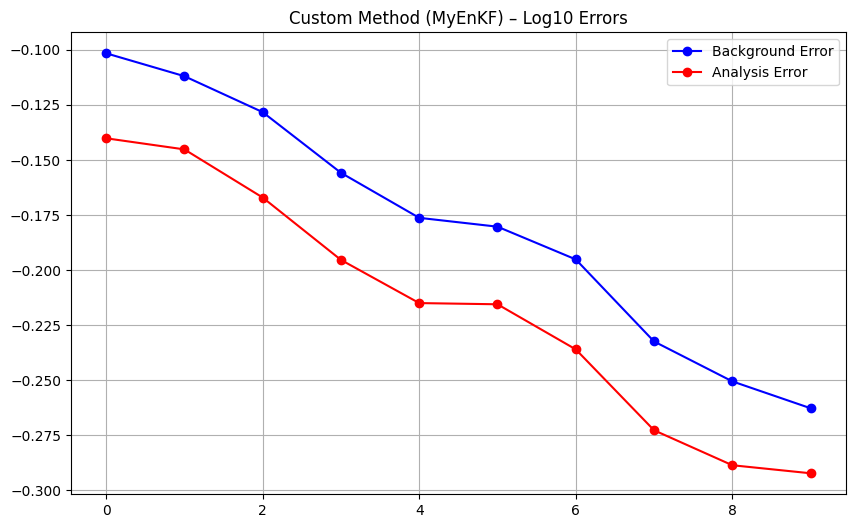

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from pyteda.simulation import Simulation
from pyteda.models import Lorenz96
from pyteda.background import Background
from pyteda.observation import Observation
from pyteda.analysis.analysis_factory import AnalysisFactory

# 🔄 Import your custom class to trigger the registration
import user_methods.my_enkf

# Setup
model = Lorenz96()
background = Background(model, ensemble_size=20)
observation = Observation(m=32, std_obs=0.01)
params = {'obs_freq': 0.1, 'end_time': 1, 'inf_fact': 1.04}

# ✅ Use your registered custom method via factory
analysis = AnalysisFactory("my_enkf", model=model).create_analysis()

# Run simulation
sim = Simulation(model, background, analysis, observation, params=params)
sim.run()

# Visualize error
errb, erra = sim.get_errors()
plt.figure(figsize=(10, 6))
plt.plot(np.log10(errb), '-ob', label='Background Error')
plt.plot(np.log10(erra), '-or', label='Analysis Error')
plt.title("Custom Method (MyEnKF) – Log10 Errors")
plt.legend()
plt.grid(True)
plt.show()